In [13]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import requests
import os

# Target download parameters
station_id = 4333
year = 2019
month = 6
format = "csv"  # or "xml" if you want XML format

for year in range(1889,2025+1):
    # Construct the download URL
    #base_url = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html"
    base_url="https://climate.weather.gc.ca/climate_data/bulk_data_e.html"
    params = {
        "format": format,
        "stationID": station_id,
        "Year": year,
        "Month": month,
        "Day": 1,
        "timeframe": 2,
    }
    # Send the request
    response = requests.get(base_url, params=params)
    # Save the CSV file
    output_dir = "weather_data"
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{output_dir}/weather_{station_id}_{year}.csv"
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"✅ CSV downloaded to: {filename}")

✅ CSV downloaded to: weather_data/weather_4333_1889.csv
✅ CSV downloaded to: weather_data/weather_4333_1890.csv
✅ CSV downloaded to: weather_data/weather_4333_1891.csv
✅ CSV downloaded to: weather_data/weather_4333_1892.csv
✅ CSV downloaded to: weather_data/weather_4333_1893.csv
✅ CSV downloaded to: weather_data/weather_4333_1894.csv
✅ CSV downloaded to: weather_data/weather_4333_1895.csv
✅ CSV downloaded to: weather_data/weather_4333_1896.csv
✅ CSV downloaded to: weather_data/weather_4333_1897.csv
✅ CSV downloaded to: weather_data/weather_4333_1898.csv
✅ CSV downloaded to: weather_data/weather_4333_1899.csv
✅ CSV downloaded to: weather_data/weather_4333_1900.csv
✅ CSV downloaded to: weather_data/weather_4333_1901.csv
✅ CSV downloaded to: weather_data/weather_4333_1902.csv
✅ CSV downloaded to: weather_data/weather_4333_1903.csv
✅ CSV downloaded to: weather_data/weather_4333_1904.csv
✅ CSV downloaded to: weather_data/weather_4333_1905.csv
✅ CSV downloaded to: weather_data/weather_4333_1

In [5]:
df = pd.DataFrame()

station_id = 4333
for year in range(1889,2025+1):
    filename = f"{output_dir}/weather_{station_id}_{year}.csv"
    df_add = pd.read_csv(filename,sep=',')
    df=pd.concat([df, df_add], ignore_index=True)
    print(f"✅ CSV {filename} added to dataframe")

✅ CSV weather_data/weather_4333_1889.csv added to dataframe
✅ CSV weather_data/weather_4333_1890.csv added to dataframe
✅ CSV weather_data/weather_4333_1891.csv added to dataframe
✅ CSV weather_data/weather_4333_1892.csv added to dataframe
✅ CSV weather_data/weather_4333_1893.csv added to dataframe
✅ CSV weather_data/weather_4333_1894.csv added to dataframe
✅ CSV weather_data/weather_4333_1895.csv added to dataframe
✅ CSV weather_data/weather_4333_1896.csv added to dataframe
✅ CSV weather_data/weather_4333_1897.csv added to dataframe
✅ CSV weather_data/weather_4333_1898.csv added to dataframe
✅ CSV weather_data/weather_4333_1899.csv added to dataframe
✅ CSV weather_data/weather_4333_1900.csv added to dataframe
✅ CSV weather_data/weather_4333_1901.csv added to dataframe
✅ CSV weather_data/weather_4333_1902.csv added to dataframe
✅ CSV weather_data/weather_4333_1903.csv added to dataframe
✅ CSV weather_data/weather_4333_1904.csv added to dataframe
✅ CSV weather_data/weather_4333_1905.csv

In [6]:
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [7]:
df.loc[:,['Year', 'Month', 'Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)']]

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
0,1889,1,1,NaN,NaN,NaN
1,1889,1,2,NaN,NaN,NaN
2,1889,1,3,NaN,NaN,NaN
3,1889,1,4,NaN,NaN,NaN
4,1889,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...
50033,2025,12,27,NaN,NaN,NaN
50034,2025,12,28,NaN,NaN,NaN
50035,2025,12,29,NaN,NaN,NaN
50036,2025,12,30,NaN,NaN,NaN


In [8]:
col_names=['Year', 'Month', 'Day','Max Temp (°C)','Min Temp (°C)','Mean Temp (°C)']

In [9]:
df_current = df.dropna(subset=col_names)[col_names].copy()

In [17]:
print(df_current.shape)      # (number_of_rows, number_of_columns)
print(len(df_current.index)) # should match number_of_rows
print(df_current.head())     # inspect actual rows

(49339, 6)
49339
     Year  Month  Day  Max Temp (°C)  Min Temp (°C)  Mean Temp (°C)
304  1889     11    1            3.9           -1.7             1.1
305  1889     11    2           12.2            0.6             6.4
306  1889     11    3           14.4            4.4             9.4
307  1889     11    4            8.3            1.7             5.0
308  1889     11    5            2.8           -0.6             1.1


In [10]:
df_current

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
304,1889,11,1,3.9,-1.7,1.1
305,1889,11,2,12.2,0.6,6.4
306,1889,11,3,14.4,4.4,9.4
307,1889,11,4,8.3,1.7,5.0
308,1889,11,5,2.8,-0.6,1.1
...,...,...,...,...,...,...
49807,2025,5,15,23.5,16.5,20.0
49808,2025,5,16,28.0,12.5,20.3
49809,2025,5,17,22.5,15.0,18.8
49810,2025,5,18,17.0,10.0,13.5


In [14]:
df_agg_month=df_current.groupby(["Year", "Month"], as_index=False).agg({
    'Max Temp (°C)': 'max',
    'Min Temp (°C)': 'min', 
    'Mean Temp (°C)': 'mean'
})
df_agg_month

,Year,Month,Max Temp (°C),Min Temp (°C),Mean Temp (°C)
0,1889,11,14.4,-11.7,1.186667
1,1889,12,5.6,-23.3,-5.629032
2,1890,1,8.9,-28.9,-9.877419
3,1890,2,7.2,-24.4,-8.803571
4,1890,3,6.1,-23.3,-4.854839
...,...,...,...,...,...
1620,2025,1,2.5,-21.0,-8.141935
1621,2025,2,6.0,-23.0,-9.160000
1622,2025,3,17.0,-23.5,-0.119355
1623,2025,4,25.0,-9.0,6.113333


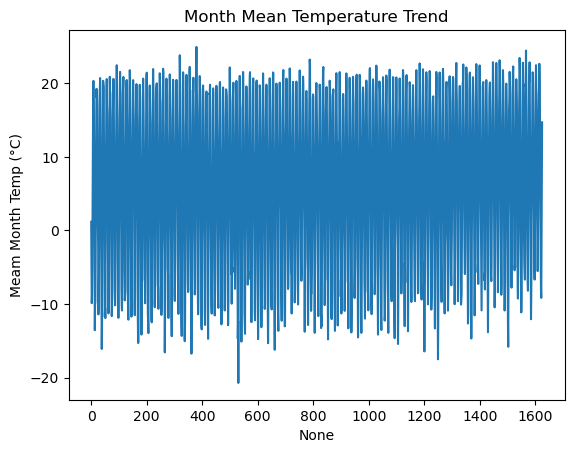

In [15]:
sns.lineplot(data=df_agg_month, x=df_agg_month.index, y='Mean Temp (°C)')
plt.title('Month Mean Temperature Trend')
plt.ylabel('Meam Month Temp (°C)')
plt.show()

In [16]:
df_current.groupby("Year").agg({
    'Max Temp (°C)': 'max',
    'Min Temp (°C)': 'min'
})

,Max Temp (°C),Min Temp (°C)
Year,,
1889,14.4,-23.3
1890,33.9,-28.9
1891,33.9,-32.8
1892,36.1,-31.1
1893,35.0,-32.2
...,...,...
2021,33.5,-23.0
2022,33.0,-26.5
2023,34.5,-33.0


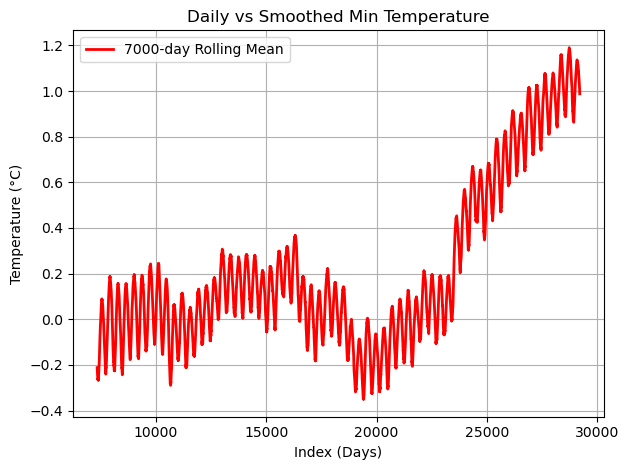

In [18]:
# Plot raw daily minimum temperature
#df_current.loc[:365*8, 'Min Temp (°C)'].plot(label='Daily Min Temp', alpha=0.6)

# Plot 30-day rolling average
df_current.loc[:365*80, 'Min Temp (°C)'].rolling(window=7000).mean().plot(
    lw=2, color='red', label='7000-day Rolling Mean'
)

# Beautify the plot
plt.title("Daily vs Smoothed Min Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Index (Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

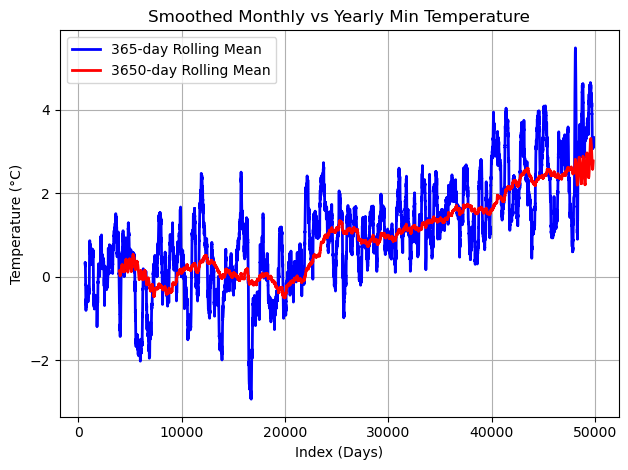

In [19]:
# Plot raw daily minimum temperature

# Plot 30-day rolling average
df_current.loc[:, 'Min Temp (°C)'].rolling(window=365).mean().plot(
    lw=2, color='blue', label='365-day Rolling Mean'
)

# Plot 365-day rolling average
df_current.loc[:, 'Min Temp (°C)'].rolling(window=3650).mean().plot(
    lw=2, color='red', label='3650-day Rolling Mean'
)

# Beautify the plot
plt.title("Smoothed Monthly vs Yearly Min Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Index (Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()